### Modelagem de Séries Temporais

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from sklearn.decomposition import PCA

df = pd.read_csv('../data/energy_data.csv', parse_dates=['timestamp'])

numeric_cols = ['power_W', 'voltage_V', 'current_A', 'temperature_C', 'humidity_%']
X = df[numeric_cols]

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

result = adfuller(X_pca.flatten())

print("Estatística do teste:", result[0])
print("p-value:", result[1])
print("Critico (1%)", result[4]['1%'])
print("Critico (5%)", result[4]['5%'])
print("Critico (10%)", result[4]['10%'])

Estatística do teste: -141.54742574597154
p-value: 0.0
Critico (1%) -3.4306770233281947
Critico (5%) -2.861684532817176
Critico (10%) -2.5668469308693944


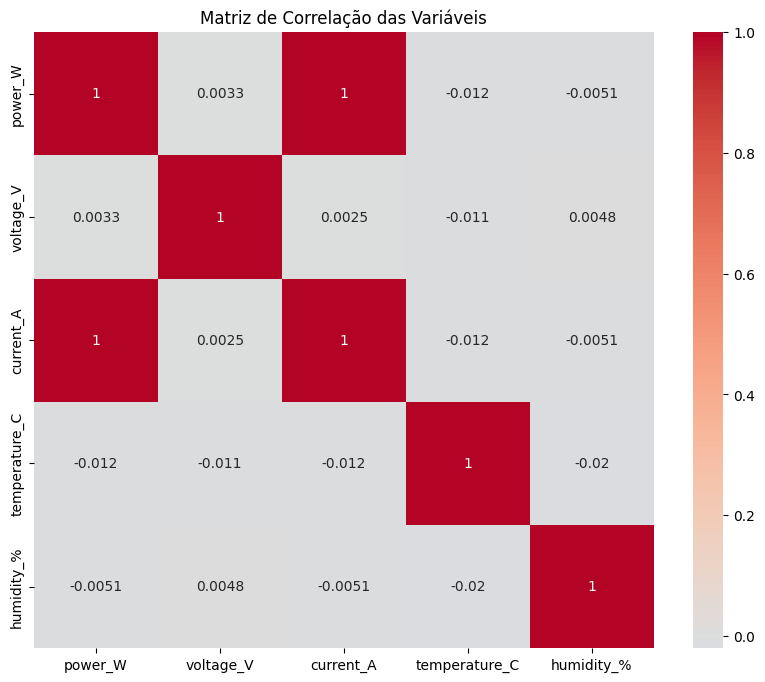


Contribuições para o primeiro componente:
               Contribuição
humidity_%         0.999943
voltage_V          0.004626
current_A         -0.000001
power_W           -0.000257
temperature_C     -0.009670


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

contributions = pd.DataFrame(pca.components_[0], index=numeric_cols, columns=['Contribuição'])
print("\nContribuições para o primeiro componente:")
print(contributions.sort_values('Contribuição', ascending=False))